In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [63]:
dataset=pd.read_csv("C:/Users/HP/Downloads/data set/BlinkIT Grocery Data.csv")
dataset.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [64]:
X = dataset.drop(columns=["Total Sales"])
y = dataset["Total Sales"]

In [65]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [66]:
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [67]:
base_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rbf", RBFSampler()),
    ("regressor", Ridge())
])

In [68]:
param_grid = {
    "rbf__gamma": [0.01, 0.1, 1.0],
    "rbf__n_components": [50, 100, 200],
    "regressor__alpha": [0.1, 1.0, 10.0]
}


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
grid_search = GridSearchCV(base_pipeline, param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Outlet '
                                                                          'Establishment '
                                                                          'Year',
                                                                          'Item '
                                                                          'Visibility',
                                                                          'Item '
                                                                          'Weight',
                                                                          'Rating']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Item '
                                                                          'Fat '
                                                                          'Content',
                                                                          'Item '
                                                                          'Identifier',
                                                                          'Item '
                                                                          'Type',
                                                                          'Outlet '
                                                                          'Identifier',
                                                                          'Outlet '
                                                                          'Location '
                                                                          'Type',
                                                                          'Outlet '
                                                                          'Size',
                                                                          'Outlet '
                                                                          'Type'])])),
                                       ('rbf', RBFSampler()),
                                       ('regressor', Ridge())]),
             param_grid={'rbf__gamma': [0.01, 0.1, 1.0],
                         'rbf__n_components': [50, 100, 200],
                         'regressor__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [71]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Test MSE:", mse)


Best Parameters: {'rbf__gamma': 0.01, 'rbf__n_components': 200, 'regressor__alpha': 0.1}
Test MSE: 3753.2764028316346


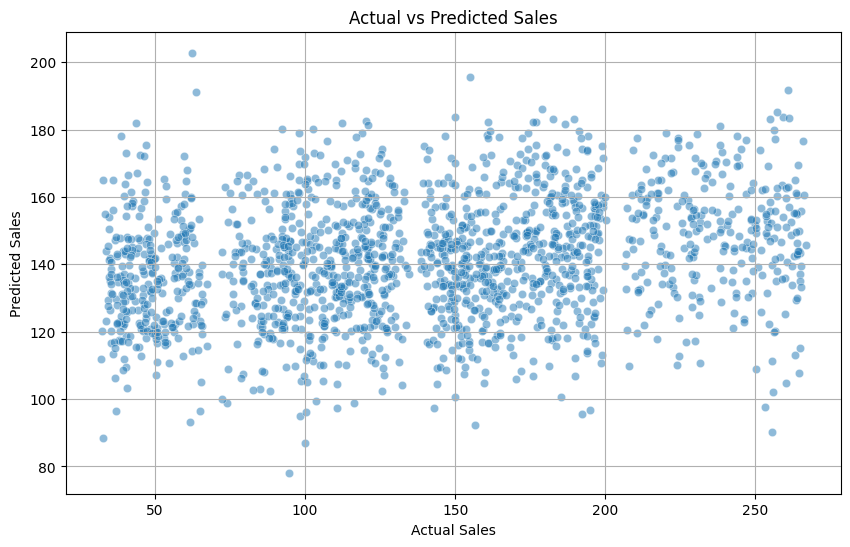

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

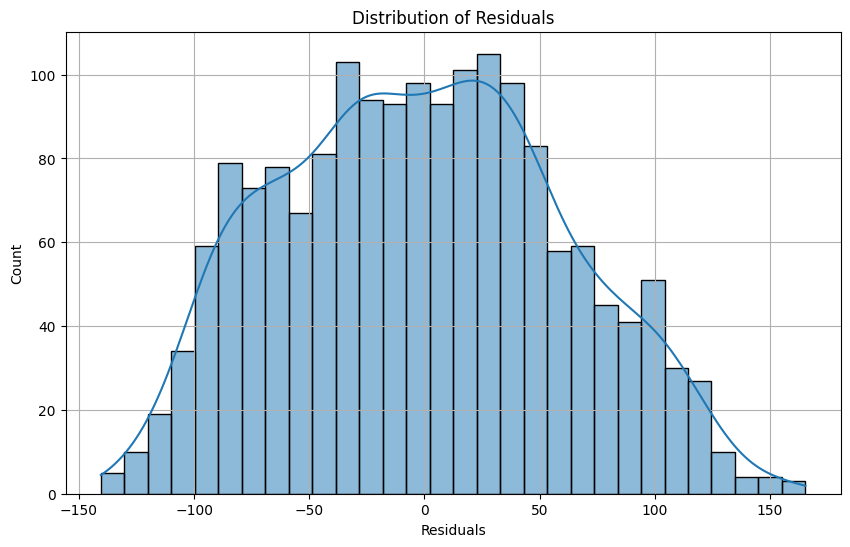

In [73]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()